In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('/home/thu/INT3041E_AI_PM2.5-Concentration-Estimation/model/cleandata.csv')

In [3]:
combined_data.head()

,Unnamed: 0,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,...,RH,PRES2M,NDVI,CO,HCHO,NO2,SO2,CLOUD,O3,AAI
0,0,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,...,74.750000,102197.203125,0.000551,0.045586,0.000060,0.000072,0.000035,0.711612,0.101653,-0.836203
1,1,105.103043,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,...,74.750000,102197.203125,-0.003006,0.041913,0.000107,0.000086,0.000056,0.761720,0.103635,-0.718537
2,2,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,...,73.687500,102228.796875,0.004388,0.042329,0.000108,0.000071,0.000026,0.867689,0.102144,-0.942304
3,3,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,...,74.750000,102197.203125,-0.001733,0.041913,0.000097,0.000085,0.000079,0.779294,0.102875,-0.692613
4,4,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,...,78.012497,102025.328125,0.016035,0.042298,0.000115,0.000082,-0.000345,0.705396,0.103488,-1.119681


In [4]:
X = combined_data.iloc[:,2:-1]
y = combined_data.iloc[:, 1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## RANDOM FOREST REGRESSOR

In [6]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
f'Coefficient of determination R^2 on train set {forest.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.9638427648238044'

In [8]:
f'Coefficient of determination R^2 on test set {forest.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set 0.7355355962486478'

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(forest, X, y, cv = 3)

In [10]:
score.mean()

np.float64(0.15851154780209797)

In [11]:
pred = forest.predict(X_test)

/tmp/ipykernel_2545187/2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='pm25', ylabel='Density'>

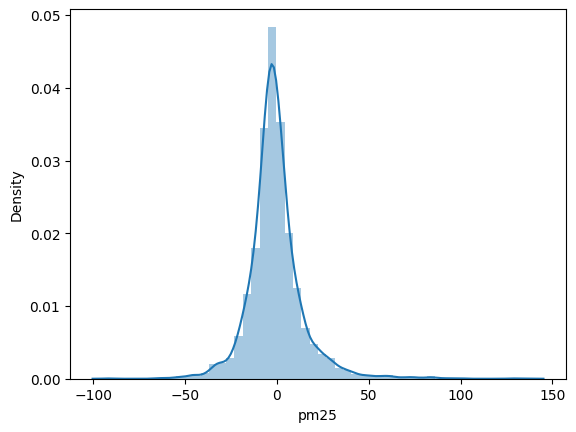

In [12]:
sns.distplot(y_test - pred)

#### HYPERPARAMETER TUNING

In [13]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 5, 10]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [14]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(forest, params, scoring='neg_mean_squared_error', 
                            cv=5, n_iter=100, random_state=43, n_jobs=-1)
search.fit(X,y)

/home/thu/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
275 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
128 fits failed with the following error:
Traceback (most recent call last):
  File "/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/thu/miniconda3/lib/py

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=43, scoring='neg_mean_squared_error')

In [15]:
search.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [16]:
search.best_score_

np.float64(-602.7416826007193)

/tmp/ipykernel_2545187/2278970355.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-pred)


<Axes: xlabel='pm25', ylabel='Density'>

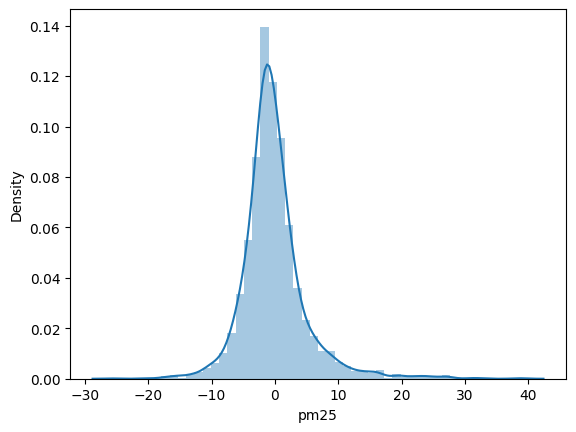

In [17]:
pred = search.predict(X_test)
sns.distplot(y_test-pred)

In [18]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 3.4438413429406842
Mean Sq Error: 26.77412938316525
Root Mean Error: 5.174372366110236


In [19]:
search.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=500)

In [20]:
import pickle
pickle.dump(search, open('random-forest.pkl', 'wb'))